# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2
from PIL import Image
from tqdm import tqdm
import gc


from torchinfo import summary
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as Transforms
from torchvision.transforms import ToTensor

In [2]:
torch.cuda.device_count()

1

In [3]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

# Functions:

In [65]:
def crop_labels(labels):
    '''
    Resizes labels from (720, 960) to (644,) for loss calculation
    Arguments:
    labels: Tensor containing batch_size number of labels
    '''
    labels = F.pad(labels, (-38, -38, -38, -38))
    return labels

In [4]:
def load_images(image_folder_path, label_folder_path):
    '''
    Arguments:
    image_folder_path: Path to directory containing train images
    label_folder_path: Path to directory containing train labels

    Output:
    images: Tensor containing images
    labels: Tensor containing labels
    '''
    image_names = os.listdir(image_folder_path)
    if ".ipynb_checkpoints" in image_names:
        image_names.remove(".ipynb_checkpoints") # .ipynb_checkpoints is not an image

    images = []
    labels = []
    
    for img_file_name in image_names:
        label_file_name = img_file_name[:-4] + "_L" + img_file_name[-4:] # name of label corresponding to image
        img = np.array(Image.open(image_folder_path + '/' + img_file_name))
        label = np.array(Image.open(label_folder_path + "/" + label_file_name))
        img = np.resize(img, (3,720,960))
        label = np.resize(label, (3,720,960))
        images.append(img)
        labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    # print(type(image_names), type(images), type(images[0]), len(images), images[0].shape)
    return images, labels

In [ ]:
images, labels = load_images("CamVid/val","CamVid/val_labels")

print(images[0].shape)

print(labels[0].shape)

# Navigation and Memory management

In [5]:
os.chdir("C:\\Users\\arvin\\MLProjectsFolder\\RoadSeg")

In [6]:
home_path = os.getcwd()
home_path

'C:\\Users\\arvin\\MLProjectsFolder\\RoadSeg'

In [7]:
os.chdir(home_path)

In [8]:
os.listdir()

['.ipynb_checkpoints', 'CamVid', 'ReadME.md', 'SegProject.ipynb']

In [9]:
os.getcwd()

'C:\\Users\\arvin\\MLProjectsFolder\\RoadSeg'

In [10]:
gc.collect()
torch.cuda.empty_cache()

# Exploring the data:

All images and labels are of shape (720, 960, 3) (h,w,c)

All label names are same, as image names, but with "_L" appended to the file name, before the file extension

## Number of images

In [ ]:
num_train_imgs = len(os.listdir("CamVid/train"))
num_train_labels = len(os.listdir("CamVid/train_labels"))
num_test_imgs = len(os.listdir("CamVid/test"))
num_test_labels = len(os.listdir("CamVid/test_labels"))
num_val_imgs = len(os.listdir("CamVid/val"))
num_val_labels = len(os.listdir("CamVid/val_labels"))

print(f"Number of train images: {num_train_imgs}")

print(f"Number of train labels: {num_train_labels}")

print(f"Number of test images: {num_test_imgs}")

print(f"Number of test labels: {num_test_labels}")

print(f"Number of val images: {num_val_imgs}")

print(f"Number of val labels: {num_val_labels}")

## Verifying Image Shapes:

### Train:

In [ ]:
print(os.getcwd())
shapes = set()
for filename in os.listdir("CamVid/train"):
    if filename == ".ipynb_checkpoints":
        continue
    img = Image.open("CamVid/train/" + filename)
    img_shape = img.size
    shapes.add(img_shape)
print(os.getcwd())

In [ ]:
print(shapes)

In [ ]:
print(os.getcwd())
shapes = set()
for filename in os.listdir("CamVid/train_labels"):
    if filename == ".ipynb_checkpoints":
        continue
    img = Image.open("CamVid/train_labels/" + filename)
    img_shape = img.size
    shapes.add(img_shape)
os.chdir(home_path)
print(os.getcwd())

In [ ]:
print(shapes)

### Test:

In [ ]:
print(os.getcwd())
shapes = set()
for filename in os.listdir("CamVid/test"):
    if filename == ".ipynb_checkpoints":
        continue
    img = Image.open("CamVid/test/" + filename)
    img_shape = img.size
    shapes.add(img_shape)
os.chdir(home_path)
print(os.getcwd())

In [ ]:
print(shapes)

In [ ]:
print(os.getcwd())
shapes = set()
for filename in os.listdir("CamVid/test_labels"):
    if filename == ".ipynb_checkpoints":
        continue
    img = Image.open("CamVid/test_labels/" + filename)
    img_shape = img.size
    shapes.add(img_shape)
os.chdir(home_path)
print(os.getcwd())

In [ ]:
print(shapes)

### val:

In [ ]:
print(os.getcwd())
shapes = set()
for filename in os.listdir("CamVid/val"):
    if filename == ".ipynb_checkpoints":
        continue
    img = Image.open("CamVid/val/" + filename)
    img_shape = img.size
    shapes.add(img_shape)
os.chdir(home_path)
print(os.getcwd())

In [ ]:
print(shapes)

In [ ]:
print(os.getcwd())
shapes = set()
for filename in os.listdir("CamVid/val_labels"):
    if filename == ".ipynb_checkpoints":
        continue
    img = Image.open("CamVid/val_labels/" + filename)
    img_shape = img.size
    shapes.add(img_shape)
os.chdir(home_path)
print(os.getcwd())

In [ ]:
print(shapes)

## Verifying naming convention:

In [ ]:
img_names = list(os.listdir("Camvid/train"))
label_names = list(os.listdir("Camvid/train_labels"))
img_names.remove(".ipynb_checkpoints")
label_names.remove(".ipynb_checkpoints")

In [ ]:
for img_name, label_name in zip(img_names, label_names):
    t_name = img_name[:-4] + "_L" + img_name[-4:]
    if(label_name != t_name):
        print(img_name, t_name, label_name)

## Visualising a sample:

(720, 960, 3) (720, 960, 3)


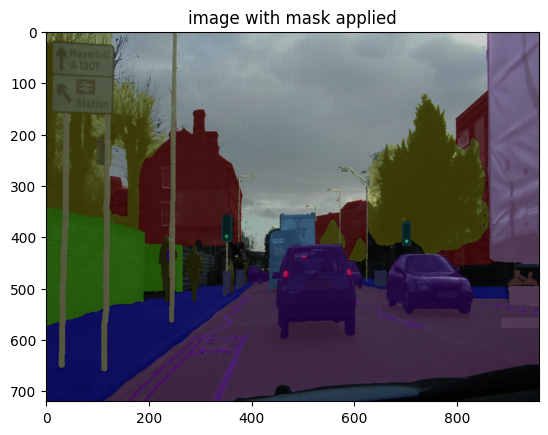

In [27]:
img_file_name, label_file_name = list(os.listdir("Camvid/train"))[10], list(os.listdir("Camvid/train_labels"))[10]

img = np.array(Image.open("Camvid/train/" + img_file_name))
label = np.array(Image.open("Camvid/train_labels/" + label_file_name))

print(img.shape, label.shape)

plt.imshow(img)
plt.imshow(label, alpha = 0.4)
plt.title("image with mask applied")
plt.show()

In [ ]:
img.resize((3 ,720, 960))
print(img.shape)
print(type(img))
img.resize((720, 960, 3))
plt.imshow(img)

# Custom Dataset:

In [11]:
class CustomDataset(Dataset):
    def __init__(self, images_folder_path, labels_folder_path, transform = None):
        self.images, self.labels = load_images(images_folder_path, labels_folder_path)
        self.images = torch.from_numpy(self.images).float()
        self.labels = torch.from_numpy(self.labels).float()
        # self.labels = self.labels.unsqueeze(1)
        self.transform = transform
        print(f"Image type: {type(self.images)}, Label type: {type(self.labels)}")
        print(f"No. images: {len(self.images)}, No. labels: {len(self.labels)}")
        print(f"Image shape: {self.images.shape}, Label shape:{(self.labels.shape)}")
        
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

In [11]:
val_ds = CustomDataset("CamVid/val","CamVid/val_labels")

Image type: <class 'torch.Tensor'>, Label type: <class 'torch.Tensor'>
No. images: 100, No. labels: 100
Image shape: torch.Size([100, 3, 720, 960]), Label shape:torch.Size([100, 3, 720, 960])


In [12]:
train_ds = CustomDataset("CamVid/train","CamVid/train_labels")

Image type: <class 'torch.Tensor'>, Label type: <class 'torch.Tensor'>
No. images: 369, No. labels: 369
Image shape: torch.Size([369, 3, 720, 960]), Label shape:torch.Size([369, 3, 720, 960])


In [ ]:
test_ds = CustomDataset("CamVid/test","CamVid/test_labels")

## Data Loaders:

Batches returnedd from data loader have shape: (batch_size, h, w, c)

In [13]:
batch_size = 4

In [14]:
train_dataloader = DataLoader(train_ds, batch_size = batch_size, shuffle = True)

In [ ]:
val_dataloader = DataLoader(val_ds, batch_size = batch_size, shuffle = True)

In [ ]:
test_dataloader = DataLoader(test_ds, batch_size = batch_size, shuffle = True)

In [15]:
for _, batch in enumerate(train_dataloader):
    print(len(batch))
    print(len(batch[1]), len(batch[0]))
    print(batch[0].shape, batch[1].shape)
    print(batch[0][0].shape, batch[1][0].shape)
    break

2
8 8
torch.Size([8, 3, 720, 960]) torch.Size([8, 3, 720, 960])
torch.Size([3, 720, 960]) torch.Size([3, 720, 960])


# Modelling and Training:

## Model Architecture:

In [96]:
class SegModel_UNet(nn.Module):
    
    def contracting_block(self, in_channels, out_channels, kernel_size = 3, output_padding = 0):
        block = torch.nn.Sequential(
            torch.nn.Conv2d(kernel_size = kernel_size, in_channels = in_channels, out_channels = out_channels),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(out_channels),
            torch.nn.Conv2d(kernel_size = kernel_size, in_channels = out_channels, out_channels = out_channels, padding = output_padding),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(out_channels)
        )
        return block
    
    def expanding_block(self, in_channels, mid_channels, out_channels, kernel_size = 3):
        block = torch.nn.Sequential(
            torch.nn.Conv2d(kernel_size = kernel_size, in_channels = in_channels, out_channels = mid_channels),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(mid_channels),
            torch.nn.Conv2d(kernel_size = kernel_size, in_channels = mid_channels, out_channels = mid_channels),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(mid_channels),
            torch.nn.ConvTranspose2d(in_channels = mid_channels, out_channels = out_channels, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)
        )
        return block

    def final_block(self, in_channels, mid_channels, out_channels, kernel_size = 3):
        block = torch.nn.Sequential(
            torch.nn.Conv2d(kernel_size = kernel_size, in_channels = in_channels, out_channels = mid_channels),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(mid_channels),
            torch.nn.Conv2d(kernel_size = kernel_size, in_channels = mid_channels, out_channels = mid_channels),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(mid_channels),
            torch.nn.Conv2d(kernel_size = kernel_size, in_channels = mid_channels, out_channels = out_channels, padding = 1),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(out_channels)
        )
        return block

    
    def crop_concat(self, upsampled, bypass, crop = False):
        # print("upsampled shape: ", upsampled.shape)
        # print("bypass shape before padding: ", bypass.shape)
        if crop:
            r_red = (bypass.size()[2] - upsampled.size()[2])//2
            c_red = (bypass.size()[3] - upsampled.size()[3])//2
            bypass = F.pad(bypass, (-c_red, -r_red, -c_red, -r_red)) #[left, right, top, bot]
        # print("bypass shape after padding: ", bypass.shape)
        if(bypass.size()[2]!=upsampled.size()[2] or bypass.size()[3]!=upsampled.size()[3]):
            bypass = F.pad(bypass,((bypass.size()[2]-upsampled.size()[2]), 0, (bypass.size()[3]-upsampled.size()[3]), 0))
        return torch.cat((upsampled, bypass), 1)

    
    def __init__(self, in_channels, out_channels):
        super(SegModel_UNet, self).__init__()

        #Encoding
        self.conv_encode_1 = self.contracting_block(in_channels = in_channels, out_channels = 64)
        self.conv_maxpool_1 = nn.MaxPool2d(kernel_size = 2)
        
        self.conv_encode_2 = self.contracting_block(in_channels = 64, out_channels = 128, output_padding = 1)
        self.conv_maxpool_2 = nn.MaxPool2d(kernel_size = 2)
        
        self.conv_encode_3 = self.contracting_block(in_channels = 128, out_channels = 256, output_padding = 1)
        self.conv_maxpool_3 = nn.MaxPool2d(kernel_size = 2)

        # self.conv_encode_4 = self.contracting_block(in_channels = 256, out_channels = 512)
        # self.conv_maxpool_4 = nn.MaxPool2d(kernel_size = 2)

        #Bottleneck
        self.bottleneck = torch.nn.Sequential(
            torch.nn.Conv2d(kernel_size = 3, in_channels = 256, out_channels = 512),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(512),
            torch.nn.Conv2d(kernel_size = 3, in_channels = 512, out_channels = 512),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(512),   
            torch.nn.ConvTranspose2d(in_channels = 512, out_channels = 256, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)
        )
        # self.bottleneck = torch.nn.Sequential(
        #     torch.nn.Conv2d(kernel_size = 3, in_channels = 512, out_channels = 1024),
        #     torch.nn.ReLU(),
        #     torch.nn.BatchNorm2d(512),
        #     torch.nn.Conv2d(kernel_size = 3, in_channels = 1024, out_channels = 1024),
        #     torch.nn.ReLU(),
        #     torch.nn.BatchNorm2d(1024),   
        #     torch.nn.ConvTranspose2d(in_channels = 1024, out_channels = 512, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)
        # )
        

        #Decode
        # self.conv_decode_4 = self.expanding_block(1024, 512, 256)
        self.conv_decode_3 = self.expanding_block(512, 256, 128)
        self.conv_decode_2 = self.expanding_block(256, 128, 64)
        self.final_layer = self.final_block(128, 64, out_channels)
    
    def forward(self, x, print_shapes = False):   
        #Encoding
        encode_block_1 = self.conv_encode_1(x)
        encode_pool_1 = self.conv_maxpool_1(encode_block_1)
        encode_block_2 = self.conv_encode_2(encode_pool_1)
        encode_pool_2 = self.conv_maxpool_2(encode_block_2)
        encode_block_3 = self.conv_encode_3(encode_pool_2)
        encode_pool_3 = self.conv_maxpool_3(encode_block_3)
        # encode_block_4 = self.conv_encode_4(encode_pool_3)
        # encode_pool_4 = self.conv_maxpool_4(encode_block_4)
        
        #Bottleneck
        bottleneck1 = self.bottleneck(encode_pool_3)
        # bottleneck1 = self.bottleneck(encode_pool_4)
        
        #Decode
        # decode_input_4 = self.crop_concat(bottleneck1, encode_block_4, crop = True)
        # upsampled_4 = self.conv_decode_4(decode_input_4)
        # decode_input_3 = self.crop_concat(decode_block_4, encode_block_3, crop = True)
        # upsampled_3 = self.conv_decode_3(decode_input_3)
        decode_input_3 = self.crop_concat(bottleneck1, encode_block_3, crop = True)
        upsampled_3 = self.conv_decode_3(decode_input_3)
        decode_input_2 = self.crop_concat(upsampled_3, encode_block_2, crop = True)
        upsampled_2 = self.conv_decode_2(decode_input_2)
        decode_input_1 = self.crop_concat(upsampled_2, encode_block_1, crop = True)
        final_output = self.final_layer(decode_input_1)

        if(print_shapes == True):
            print("encode_block_1: ", encode_block_1.shape)
            print("encode_pool_1: ", encode_pool_1.shape)
            print("encode_block_2: ", encode_block_2.shape)
            print("encode_pool_2: ", encode_pool_2.shape)
            print("encode_block_3: ", encode_block_3.shape)
            print("encode_pool_3: ", encode_pool_3.shape)
            print("bottleneck1: ",bottleneck1.shape)
            print("decode_input_3: ", decode_input_3.shape)
            print("upsampled_3: ", upsampled_3.shape)
            print("decode_input_2: ", decode_input_2.shape)
            print("upsampled_2: ", upsampled_2.shape)
            print("decode_input_1: ", decode_input_1.shape)
            print("final_output: ", final_output.shape)
        return final_output

In [97]:
unet_model = SegModel_UNet(in_channels = 3, out_channels = 3)

In [98]:
print(unet_model)

SegModel_UNet(
  (conv_encode_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_encode_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_maxpool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_encode_3): Sequential(
    (0): Conv2d(12

batch_size = 4
summary(unet_model, input_size=(batch_size, 3, 720, 960))

## Loss Function:

I use both Dice Loss and Cross Entropy loss as it encourages both accurate class predictions (Cross-Entropy) and accurate segmentation masks (Dice Loss).

In [99]:
class DiceLoss(nn.Module):
    def __init__(self, epsilon=1e-5):
        super(DiceLoss, self).__init__()
        self.epsilon = epsilon

    def forward(self, predicted, target):
        # Flatten predicted and target tensors along the batch dimension
        predicted_flat = predicted.view(predicted.size(0), -1)
        target_flat = target.view(target.size(0), -1)

        intersection = torch.sum(predicted_flat * target_flat, dim=1)
        union = torch.sum(predicted_flat, dim=1) + torch.sum(target_flat, dim=1)

        dice_coefficient = 1 - (2.0 * intersection + self.epsilon) / (union + self.epsilon)

        # Average Dice coefficient across the batch
        dice_loss = torch.mean(dice_coefficient)

        return dice_loss

## Training:

In [100]:
gc.collect()
torch.cuda.empty_cache()

In [101]:
# if(torch.cuda.is_available):
#     print("Using cuda")
#     device = torch.device("cuda")
# else:
#     print("Using CPU")
#     device = torch.device("cpu")
device = torch.device("cpu")
print(device)

cpu


In [104]:
unet_model = unet_model.to(device)
num_epochs = 20

criterion1 = DiceLoss()
criterion2 = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(unet_model.parameters() , lr = 0.01)

losses = []
for epoch in tqdm(range(num_epochs)):
    unet_model.train()
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(train_dataloader):
        optimizer.zero_grad()
        # print(images.shape, type(images), labels.shape, type(labels))
        # images = images.to(device)
        # labels = labels.to(device)
        outputs = unet_model(images, print_shapes = False)
        labels = crop_labels(labels)
        # print(outputs.shape, labels.shape)
        # break
        loss1 = criterion1(outputs, labels)
        loss2 = criterion2(outputs, labels)
        loss = loss1+loss2
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f"Batch: {batch_idx+1}, loss: {loss.item()}")
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_dataloader)}")
    losses.append(running_loss/len(train_dataloader))

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

Batch: 1, loss: 343.4178771972656


  0%|                                                                                           | 0/20 [04:08<?, ?it/s]


KeyboardInterrupt: 

# Evaluation:

# Testing: